In [1]:
import warnings
import time
import datetime
import sys
import numpy as np

from matplotlib import cm, pyplot as plt
import matplotlib.dates as dates
from hmmlearn import hmm

import random
import pandas as pd
from scipy import stats
from sklearn import preprocessing

pd.options.mode.use_inf_as_na = True

In [3]:
df = pd.read_csv('SP500.csv')

In [4]:
date_list = pd.to_datetime(df['Date'])
volume_list = df['Volume']
open_list = df['Volume']
close_list = df['Close']

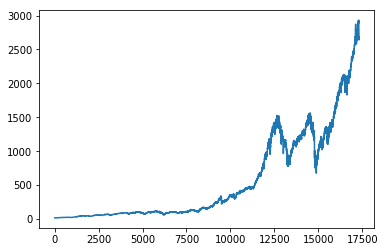

In [47]:
plt.plot(close_list)

In [60]:
# feature 1
# everyday's closing prices' difference in percentage 
feature_1=np.diff(close_list)/close_list[:-1]

In [61]:
# feature 2
# everday's volume
feature_2=volume_list[1:]

In [62]:
# create dataset
x=np.c_[feature_1,feature_2]

In [63]:
# build HMM model
from hmmlearn.hmm import GaussianHMM
model=GaussianHMM(n_components=10,n_iter=1000,covariance_type='full') # 10 hidden states

In [64]:
model = model.fit(x)

In [65]:
# most likely state sequence corresponding to dataset
hidden_states = model.predict(x)
hidden_states

array([2, 2, 2, ..., 3, 3, 3])

In [66]:
hidden_states[1:100]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [67]:
# Matrix of transition probabilities between states.
print ("Transition matrix: ", model.transmat_)

Transition matrix:  [[9.96820463e-001 0.00000000e+000 2.76150273e-141 0.00000000e+000
  3.19932430e-167 5.91037182e-004 8.87006610e-309 8.62571636e-004
  1.72592797e-003 0.00000000e+000]
 [0.00000000e+000 8.98683514e-001 0.00000000e+000 1.28858042e-002
  5.50622802e-080 0.00000000e+000 1.84394381e-002 9.03382792e-004
  0.00000000e+000 6.90878608e-002]
 [6.01010488e-127 0.00000000e+000 9.98075330e-001 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 3.75829866e-076
  1.92466981e-003 0.00000000e+000]
 [0.00000000e+000 2.55673104e-002 0.00000000e+000 8.55335531e-001
  1.96639825e-003 0.00000000e+000 3.80264479e-003 1.76088927e-002
  0.00000000e+000 9.57192225e-002]
 [4.64417710e-155 2.13141188e-072 0.00000000e+000 1.28030063e-003
  9.96718866e-001 7.17915568e-004 1.28291798e-003 1.38347857e-051
  4.59367910e-318 1.08609233e-030]
 [7.41694002e-004 0.00000000e+000 0.00000000e+000 1.73207565e-292
  1.51408218e-003 9.97744224e-001 2.71737504e-197 2.41720737e-086
  1.16416237e

In [68]:
# Mean and Covariance parameters for each state.
print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", model.covars_[i])
    print()

Means and vars of each hidden state
0th hidden state
mean =  [5.82055993e-04 1.15556349e+08]
var =  [[8.59490977e-05 4.34261017e+04]
 [4.34261017e+04 3.60239039e+15]]

1th hidden state
mean =  [8.33303149e-04 3.14063767e+09]
var =  [[ 4.19310812e-05 -1.20831537e+05]
 [-1.20831537e+05  9.68496587e+16]]

2th hidden state
mean =  [4.72602283e-04 2.92671077e+06]
var =  [[4.74289398e-05 2.96053641e+02]
 [2.96053641e+02 1.84524439e+12]]

3th hidden state
mean =  [-1.94969120e-04  4.93409291e+09]
var =  [[ 2.29753873e-04 -6.59069396e+05]
 [-6.59069396e+05  4.83456283e+17]]

4th hidden state
mean =  [7.74446666e-05 1.18584027e+09]
var =  [[1.67271682e-04 1.15007797e+05]
 [1.15007797e+05 1.06643762e+17]]

5th hidden state
mean =  [7.53384024e-04 3.83425452e+08]
var =  [[5.74753243e-05 6.63885156e+04]
 [6.63885156e+04 1.70094450e+16]]

6th hidden state
mean =  [3.32728014e-04 2.21872926e+09]
var =  [[5.74810437e-05 3.26605340e+04]
 [3.26605340e+04 1.53602941e+17]]

7th hidden state
mean =  [-3.4

In [91]:
predict_diff, predict_seq = model.sample(17000, random_state=540)

In [92]:
close_list[0]

16.66

In [93]:
predict_diff_0 = predict_diff[:,0]

In [94]:
predict_diff_0

array([ 0.00034064,  0.00626487,  0.00676279, ...,  0.00304498,
       -0.00841896,  0.00288951])

In [95]:
a = predict_diff_0.tolist()
result = []
result.append((1+a[0])*close_list[0])
for i in range(1, len(a)):
    result.append(result[-1] * (1+a[i]))

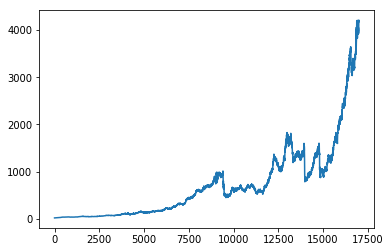

In [96]:
plt.plot(result)

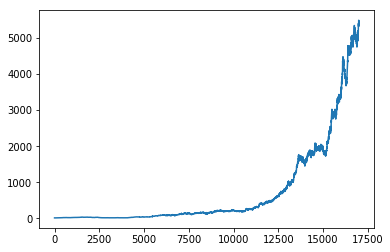

In [99]:
predict_diff, predict_seq = model.sample(17000, random_state=1)
predict_diff_0 = predict_diff[:,0]

a = predict_diff_0.tolist()
result = []
result.append((1+a[0])*close_list[0])
for i in range(1, len(a)):
    result.append(result[-1] * (1+a[i]))
    
plt.plot(result)

NameError: name 'Date' is not defined

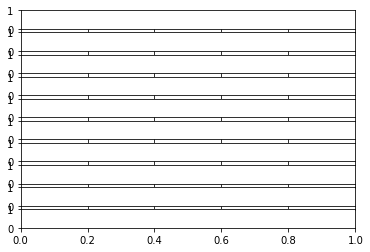

In [77]:
# 画图描述
fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(Date[mask], Close[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()

In [ ]:
plt.figure(figsize=(25,18))
for i in range(model.n_components):
    pos = (hidden_states == i)
    plt.plot_date(Date[pos],Close[pos],'o',label='hidden state %d'%i,lw=2)
    plt.legend(loc='upper left')